In [1]:
%load_ext autoreload

In [2]:
autoreload 2

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
from scipy import stats, optimize
import numpy as np
import sympy as sym

import inputs
import models
import shooting

from __future__ import division
#from sympy import init_printing

<a id='tops'></a>
## Welcome to the Final Estimation notebook part 1! - Also known as 23/06/2015

This notebook is used to play around and tune up the code and the data so we can carry on an estimation (probably in another notebook, for the time being just at the end).

Recommended to execute the first cell below.

 - **Click [here](#estimation_head) to skip to the start of the estimation bit**
 - ** Click [here](#iterate) to skip to parameter iteration **
 - ** Click [here](#final) to skip to final estimation **

In [91]:
# define some default workers skill
x, mu1, sigma1 = sym.var('x, mu1, sigma1')
skill_cdf = 142.85*(0.5 + 0.5 * sym.erf((sym.log(x) - mu1) / sym.sqrt(2 * sigma1**2)))
skill_params = {'mu1': 0.0, 'sigma1': 1.0}
skill_bounds = [0.005, 20.0]

workers = inputs.Input(var=x,
                       cdf=skill_cdf,
                       params=skill_params,
                       bounds=skill_bounds,
                       )

# define some default firms
y, mu2, sigma2 = sym.var('y, mu2, sigma2')
productivity_cdf = (0.5 + 0.5 * sym.erf((sym.log(y) - mu2) / sym.sqrt(2 * sigma2**2)))
productivity_params = {'mu2': 0.0, 'sigma2': 1.0}
productivity_bounds = [0.005, 20.0]

firms = inputs.Input(var=y,
                     cdf=productivity_cdf,
                     params=productivity_params,
                     bounds=productivity_bounds,
                     )

# define symbolic expression for CES between x and y
omega_A, sigma_A, Big_A = sym.var('omega_A, sigma_A, Big_A')
A = ((omega_A * x**((sigma_A - 1) / sigma_A) + 
     (1 - omega_A) * y**((sigma_A - 1) / sigma_A))**(sigma_A / (sigma_A - 1))) 

# define symbolic expression for Cobb-Douglas between l and r
l, r, omega_B, sigma_B = sym.var('l, r, omega_B, sigma_B')
B = l**omega_B * r**(1 - omega_B)

F = Big_A * (A * B)

F_params = {'omega_A':0.6, 'omega_B':0.7, 'sigma_A':0.99, 'Big_A':1e5}

model = models.Model('positive',
                     workers=workers,
                     firms=firms,
                     production=F,
                     params=F_params)

solver = shooting.ShootingSolver(model=model)

In [92]:
#knots= np.logspace(np.log10(workers.lower), np.log10(workers.upper), 6000,
#                   endpoint=True, base=10)

In [93]:
solver.solve(750, tol=1e-3, number_knots=2000, integrator='lsoda', message=True)

Exhausted workers: initial guess of 375.0 for firm size is too high!
Exhausted firms: initial guess of 187.5 for firm size is too low.
Exhausted firms: initial guess of 281.25 for firm size is too low.
Exhausted firms: initial guess of 328.125 for firm size is too low.
Exhausted firms: initial guess of 351.5625 for firm size is too low.
Exhausted workers: initial guess of 363.28125 for firm size is too high!
Exhausted firms: initial guess of 357.421875 for firm size is too low.
Exhausted firms: initial guess of 360.3515625 for firm size is too low.
Exhausted firms: initial guess of 361.81640625 for firm size is too low.
Exhausted workers: initial guess of 362.548828125 for firm size is too high!
Exhausted firms: initial guess of 362.182617188 for firm size is too low.
Exhausted workers: initial guess of 362.365722656 for firm size is too high!
Exhausted firms: initial guess of 362.274169922 for firm size is too low.
Exhausted workers: initial guess of 362.319946289 for firm size is too

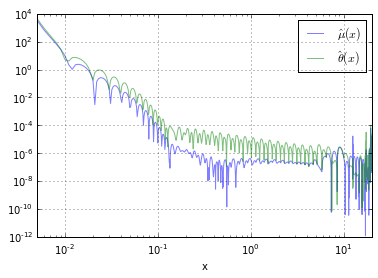

In [14]:
# Plotting the residuals
solver.residuals.plot(loglog=True, alpha=0.5)
plt.show()

In [94]:
solver.solution

,$\mu(x)$,$\theta(x)$,$w(x)$,$\pi(x)$
x,,,,
0.005000,0.004998,7.257668,193.086590,600.582187
0.015003,0.023871,22.618690,496.006512,4808.150286
0.025005,0.039772,28.756227,769.151815,9479.101829
0.035008,0.055655,33.671902,1026.843698,14818.191710
0.045010,0.071528,37.881188,1274.191141,20686.231989
0.055013,0.087392,41.615022,1513.826600,26999.111725
0.065015,0.103248,45.000982,1747.349493,33699.618520
0.075018,0.119097,48.118327,1975.830627,40745.855720
0.085020,0.134938,51.020247,2200.034934,48105.568528


In [16]:
# Store the results
thetas_hat = solver.solution['$\\theta(x)$'].values
ys_hat = solver.solution['$\\mu(x)$'].values
ws_hat = solver.solution['$w(x)$'].values
pis_hat = solver.solution['$\\pi(x)$'].values
rxs = solver.solution.index.values

[Back to top](#tops)

** Distribution time! **

In [17]:
# Sorting the thetas by size
n_thetas = dict(zip(list(map(str, range(0,6000))),thetas_hat))

import operator
sort_thetas = sorted(n_thetas.items(), key=operator.itemgetter(1))

theta_range = sorted(thetas_hat)

def pdf_workers(x):
    return 50.0*np.sqrt(2)*np.exp(-(-0.0 + np.log(x))**2/(2**2))/(np.sqrt(np.pi)*x)

pdf_x = pdf_workers(rxs)         # calculates pdf of xs in one step
n_pdf_x = dict(enumerate(pdf_x)) # creates a dictionary where the keys are the #obs of x

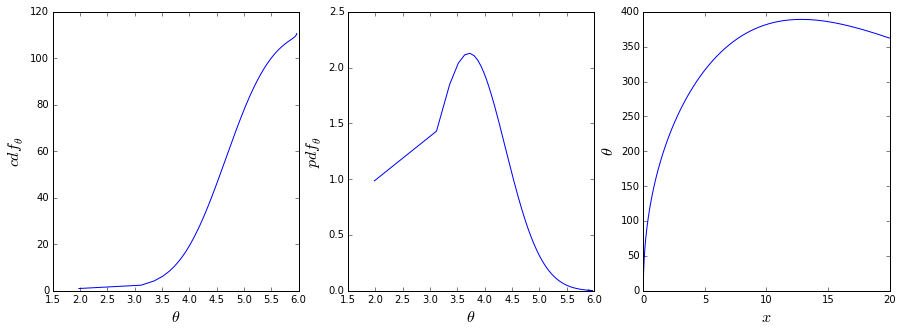

In [18]:
#Getting firm size distribution differently

pdf_theta = np.empty(0)
for pair in sort_thetas:
    index = int(pair[0])
    pdf_theta = np.hstack((pdf_theta,(n_pdf_x[index]/pair[1])))

cdf_theta = np.cumsum(pdf_theta)

#Plotting
plt.figure(figsize=(15,5))

plt.subplot(131)    
plt.plot(np.log(theta_range),cdf_theta)
plt.ylabel('$cdf_{\\theta}$', fontsize=16)
plt.xlabel('$\\theta$', fontsize=16)

plt.subplot(132)    
plt.plot(np.log(theta_range),pdf_theta)
plt.ylabel('$pdf_{\\theta}$', fontsize=16)
plt.xlabel('$\\theta$', fontsize=16)

plt.subplot(133)
plt.plot(rxs,thetas_hat)
plt.ylabel('$\\theta$', fontsize=16)
plt.xlabel('$x$', fontsize=16)

plt.show()

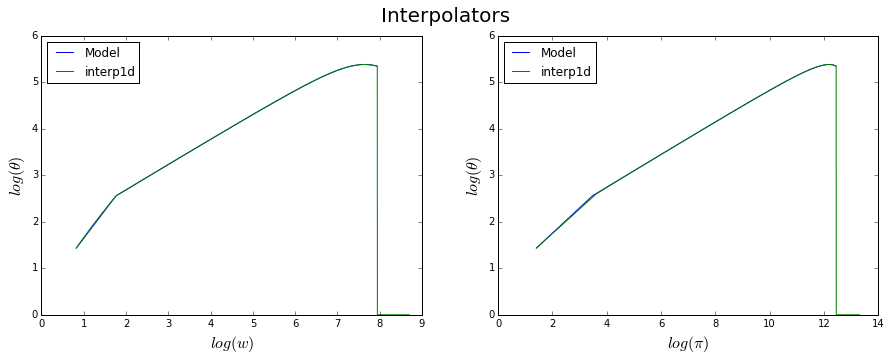

In [193]:
from scipy.interpolate import PchipInterpolator
from scipy.interpolate import interp1d

th1_w = PchipInterpolator(ws_hat,thetas_hat)
th2_w = interp1d(ws_hat,thetas_hat,bounds_error=False,fill_value=1.0)
th1_pi = PchipInterpolator(pis_hat,thetas_hat)
th2_pi = interp1d(pis_hat,thetas_hat,bounds_error=False,fill_value=1.0)

w_range = np.linspace(min(ws_hat),6000,18000)
pi_range = np.linspace(min(pis_hat),600000,18000)

plt.figure(figsize=(15,5))
plt.suptitle('Interpolators', fontsize=20)

plt.subplot(121)    
plt.plot(np.log(ws_hat),np.log(thetas_hat), label='Model')
#plt.plot(np.log(w_range),np.log(th1_w(w_range)), label='Pchip')
plt.plot(np.log(w_range),np.log(th2_w(w_range)), label='interp1d')
plt.ylabel('$log(\\theta)$', fontsize=16)
plt.xlabel('$log(w)$', fontsize=16)
plt.legend(loc='best')

plt.subplot(122)    
plt.plot(np.log(pis_hat),np.log(thetas_hat), label='Model')
#plt.plot(np.log(pi_range),np.log(th1_pi(pi_range)), label='Pchip')
plt.plot(np.log(pi_range),np.log(th2_pi(pi_range)), label='interp1d')
plt.xlabel('$log(\\pi)$', fontsize=16)
plt.ylabel('$log(\\theta)$', fontsize=16)
plt.legend(loc='best')

plt.show()

[Back to top](#tops)

# ESTIMATION BIT

<a id='estimation_head'></a>

In [58]:
import new_estimation_file_plot as est

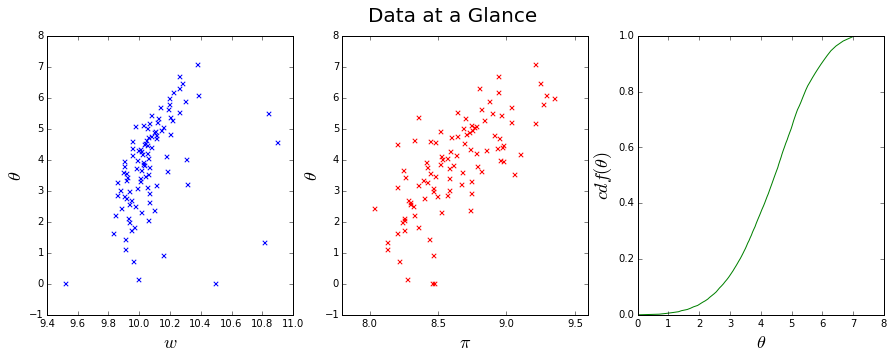

In [66]:
# Reading data from csv file
theta,wage,profit = est.import_data('SPA05.csv', ID=False, weights=False, logs=False)

wage = np.log(np.exp(wage)*360) # ANNUAL wage

cdf_theta_data = []
r = 0.0
for i in range(len(theta)):
    r += theta[i]
    cdf_theta_data.append(r)
cdf_theta_data = np.array(cdf_theta_data)/cdf_theta_data[-1]


plt.figure(figsize=(15,5))
plt.suptitle('Data at a Glance', fontsize=20)
plt.subplot(131)
plt.scatter(wage,theta, marker='x')
plt.xlabel('$w$', fontsize=18)
plt.ylabel('$\\theta$', fontsize=18)

plt.subplot(132)
plt.scatter(profit,theta, marker='x', color='r')
plt.xlabel('$\\pi$', fontsize=18)
plt.ylabel('$\\theta$', fontsize=18)

plt.subplot(133)
plt.plot(theta, cdf_theta_data, color='g')
plt.ylabel('$cdf(\\theta)$', fontsize=18)
plt.xlabel('$\\theta$', fontsize=18)

plt.show()

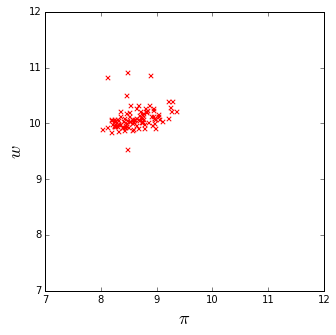

In [67]:
plt.figure(figsize=(5,5))
plt.scatter(profit,wage, marker='x', color='r')
plt.xlabel('$\\pi$', fontsize=18)
plt.ylabel('$w$', fontsize=18)
plt.xlim(7,12)
plt.ylim(7,12)
plt.show()

In [68]:
# SolveModel
functions, new_guess = est.Solve_Model(F, F_params, workers, firms, 'positive', 2000, 'lsoda', 750.0,tolerance=1e-3)
w_theta, pi_theta, thetas, xs_fm = functions

Success! All workers and firms are matched


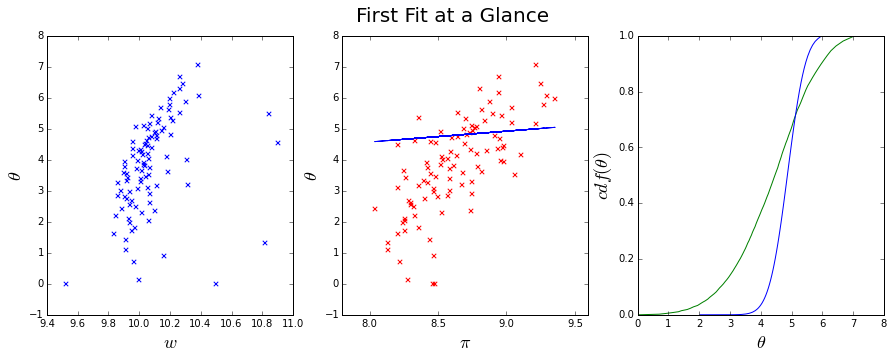

In [69]:
from get_cdf import get_cdf, pdf_workers
cdf_model = get_cdf(thetas, xs_fm)

plt.figure(figsize=(15,5))
plt.suptitle('First Fit at a Glance', fontsize=20)
plt.subplot(131)
plt.scatter(wage,theta, marker='x')
plt.plot(wage,np.log(w_theta(np.exp(wage))))
plt.xlabel('$w$', fontsize=18)
plt.ylabel('$\\theta$', fontsize=18)

plt.subplot(132)
plt.scatter(profit,theta, marker='x', color='r')
plt.plot(profit,np.log(pi_theta(np.exp(profit))))
plt.xlabel('$\\pi$', fontsize=18)
plt.ylabel('$\\theta$', fontsize=18)

plt.subplot(133)
plt.plot(theta, cdf_theta_data, color='g')
plt.plot(theta,cdf_model(theta))
plt.ylabel('$cdf(\\theta)$', fontsize=18)
plt.xlabel('$\\theta$', fontsize=18)

plt.show()

###Make sure the right file is loaded!

In [77]:
import new_estimation_file as est

In [76]:
# Checking the mean square error
functions, new_guess = est.Solve_Model(F, F_params, workers, firms, 'positive', 2000, 'lsoda', 750.0,tolerance=1e-3)
est.Calculate_MSE( (theta,wage,profit), (functions) )

Success! All workers and firms are matched
1803.62500672 302.301589744 9900.0


12005.926596463378

<a id='iterate'></a>

[Back to top](#tops)

## Parameter Iteration

## $\omega_b$ and $\omega_a$

In [85]:
######## Omega B #############
h_theta = 100
results9 = np.zeros(2)
bad_result9 = np.zeros(2)
for om in np.arange(0.95,0.6,-0.05):
    params_i = {'omega_A':0.6, 'omega_B':om, 'sigma_A':0.99, 'Big_A':1e3}
    try:
        # Solving Phase
        functions, guess = est.Solve_Model(F, params_i, workers, firms, 'positive', 2000, 'lsoda', 1e4, tolerance=1e-3)
        err = (est.Calculate_MSE((theta,wage,profit), functions))
        # Storage phase
        results_i = np.hstack((om,err))        
        results9 = np.vstack((results9,results_i))
        # Update phase
        h_theta = guess
        print 'Done with', om
    except AssertionError, e:
        results_i = np.hstack((om,'Failure'))
        bad_result9 = np.vstack((bad_result9,results_i))
        print 'Skipped error', e, om
        pass


Skipped error Fail to solve! 0.95
Skipped error Upper and lower bounds are identical: check solver tols! 0.9
Skipped error Upper and lower bounds are identical: check solver tols! 0.85
Success! All workers and firms are matched
errors: 0.109233511954 264.48268517 9900.0
Done with 0.8
Success! All workers and firms are matched
errors: 201.094667438 279.150871627 9900.0
Done with 0.75
Success! All workers and firms are matched
errors: 1803.62500776 302.301589744 9900.0
Done with 0.7
Success! All workers and firms are matched
errors: 5405.59149462 330.106822395 9900.0
Done with 0.65


In [97]:
######## Omega A and B at the same time! #############

h_theta = 100
results10 = np.zeros(3)
bad_result10 = np.zeros(3)
for om_B in np.arange(0.95,0.1,-0.05):
    for om_A in np.arange(om_B-0.05,0.05,-0.05):
        params_i = {'omega_A':om_A, 'omega_B':om_B, 'sigma_A':0.99, 'Big_A':1e5}
        try:
            # Solving Phase
            functions, guess = est.Solve_Model(F, params_i, workers, firms,'positive', 2000, 'lsoda', 1e4, tolerance=1e-3)
            err = (est.Calculate_MSE((theta,wage,profit), functions))
            # Storage phase
            results_i = np.hstack((om_A,om_B,err))        
            results10 = np.vstack((results10,results_i))
            # Update phase
            h_theta = guess
            print 'Done with', om_A,om_B
        except AssertionError:
            results_i = np.hstack((om_A,om_B,'Failure'))
            bad_result10 = np.vstack((bad_result10,results_i))
            print e, om_A,om_B
            pass
        except ValueError:
            results_i = np.hstack((om_A,om_B,'Failure'))
            bad_result10 = np.vstack((bad_result10,results_i))
            print e, om_A,om_B
            pass


Success! All workers and firms are matched
errors: 100.172233478 293.133384289 223.671036656
Done with 0.9 0.95
Upper and lower bounds are identical: check solver tols! 0.85 0.95
Upper and lower bounds are identical: check solver tols! 0.8 0.95
Upper and lower bounds are identical: check solver tols! 0.75 0.95
Upper and lower bounds are identical: check solver tols! 0.7 0.95
Upper and lower bounds are identical: check solver tols! 0.65 0.95
Upper and lower bounds are identical: check solver tols! 0.6 0.95
Upper and lower bounds are identical: check solver tols! 0.55 0.95
Upper and lower bounds are identical: check solver tols! 0.5 0.95
Upper and lower bounds are identical: check solver tols! 0.45 0.95
Upper and lower bounds are identical: check solver tols! 0.4 0.95
Upper and lower bounds are identical: check solver tols! 0.35 0.95
Upper and lower bounds are identical: check solver tols! 0.3 0.95
Upper and lower bounds are identical: check solver tols! 0.25 0.95
Upper and lower bounds 

## $\omega_b$, $\omega_a$ and $\sigma$

In [ ]:
######## Omega A and B with sigma #############

h_theta = 100
results12 = np.zeros(3)
bad_result12 = np.zeros(3)
for sigma_i in np.arange(0.95,0.1,-0.05):
    for om_B in np.arange(0.95,0.1,-0.05):
        for om_A in np.arange(om_B-0.05,0.05,-0.05):
            params_i = {'omega_A':om_A, 'omega_B':om_B, 'sigma_A':sigma_i, 'Big_A':1e5}
            try:
                # Solving Phase
                functions, guess = est.Solve_Model(F, params_i, workers, firms,'positive', 2000, 'lsoda', 1e4, tolerance=1e-3)
                err = (est.Calculate_MSE((theta,wage,profit), functions))
                # Storage phase
                results_i = np.hstack((om_A,om_B,err))        
                results12 = np.vstack((results12,results_i))
                # Update phase
                h_theta = guess
                print 'Done with', om_A,om_B,sigma_i
            except AssertionError:
                results_i = np.hstack((om_A,om_B,'Failure'))
                bad_result12 = np.vstack((bad_result12,results_i))
                print e, om_A,om_B,sigma_i
                pass
            except ValueError:
                results_i = np.hstack((om_A,om_B,'Failure'))
                bad_result12 = np.vstack((bad_result12,results_i))
                print e, om_A,om_B,sigma_i
                pass


In [142]:
overlord[1]

(11, array([[   0.9       ,  337.51453811]]))

In [127]:
params_i = {'omega_A':0.75, 'omega_B':0.9, 'sigma_A':0.3, 'sigma_B':1.0}
functions, guess = est.Solve_Model(F, params_i, workers, firms, 'positive', 6000, 'lsoda', 100)
mu_hat, theta_hat, w_hat = functions

Success! All workers and firms are matched


In [145]:
guess

2.2901520537071285

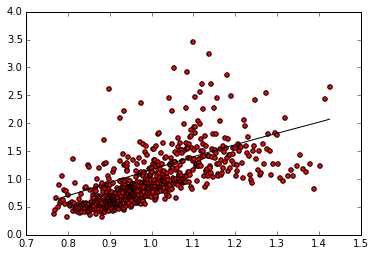

In [144]:
# Plotting the function vs the data (some fit better than others)
mus1 = []
xs_copy = np.sort(xs)
for i in range(len(xs_copy)):
    mus1.append(theta_hat(xs_copy[i]))
plt.plot(xs_copy, mus1, c='black')
plt.scatter(xs, thetas, c='r')
#plt.xlim(0.7,1.5)
#plt.ylim(0.85,1.2)
plt.show()

<a id='final'></a>

[Back to top](#tops)

## Final Estimation



In [73]:
# Starting, arbitrary parameters
ps = (0.9, 0.9, 0.3)

# Reading data from csv file
xs, ys, thetas, ws = est.import_data('data05_normed2.csv', ID=False)

# Worker skill parameters are taken from Histograms.ipynb - and correspond to log wages mean and variance
skill_p = (1.0000000000000002, 0.16382221849787501)
skill_b = [1e-2, 1.4991086434]

#skill_p = (3.8894753094349528, 0.63718247398434291)
#skill_b = [0.01, 340.6127]

# Firm skill parameters are also taken from Histograms.ipynb - and correspond to log profit mean and variance (firm level)
firm_p = (1.0000000000000002, 0.26979838777863219)
firm_b = [0.0921194652671, 1.95530939088]

#firm_p = (7.13768801209, 1.92573671813)
#firm_b = [1.93, 1151284.0]

In [62]:
import estimation_code_norm as est

In [74]:
# Starting, arbitrary parameters
ps = (0.6,  0.75,  0.37837383, 1e2)

# Reading data from csv file
pis, thetas, ws = est.import_data2('SPA05.csv', ID=False)

# Worker skill parameters are taken from Histograms.ipynb - and correspond to log wages mean and variance
skill_p = (0.0, 1.0)
skill_b = [1e-2, 5.0]

#skill_p = (3.8894753094349528, 0.63718247398434291)
#skill_b = [0.01, 340.6127]

# Firm skill parameters are also taken from Histograms.ipynb - and correspond to log profit mean and variance (firm level)
firm_p = (0.0, 1.0)
firm_b = [1e-2, 5.0]

#firm_p = (7.13768801209, 1.92573671813)
#firm_b = [1.93, 1151284.0]

In [98]:
res = optimize.minimize(est.StubbornObjectiveFunction, 
                        (0.9, 0.60, 0.30,90.53818477), 
                        args=((pis, thetas, ws), skill_p, skill_b, firm_p, firm_b, 6.0), 
                        method='L-BFGS-B', jac=None, hess=None, hessp=None, 
                        bounds=((1e-3,1.0-1e-3),(1e-3,1.0-1e-3),(1e-3,1.0-1e-3),(1e-3,None)), 
                        constraints=(), tol=None, callback=None, options=None)

[autoreload of new_estimation_file failed: Traceback (most recent call last):
  File "C:\Users\s1254888\Canopy\Environment\User\lib\site-packages\IPython\extensions\autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
NameError: name 'Object' is not defined
]


NameError: name 'pis' is not defined

In [68]:
res

  status: 2
 success: False
    nfev: 1425
     fun: 84.906906000382605
       x: array([  0.59113953,   0.55909586,   0.27660712,  90.53818476])
 message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     jac: array([  1.23975579e+05,   8.81216357e+04,   8.91410494e+04,
        -5.17139668e+01])
     nit: 23

In [161]:
res = optimize.minimize(est.BulletProofObjectiveFunction, (0.55, 0.9, 0.3), args=((xs, ys, thetas, ws), skill_p, skill_b, firm_p, firm_b, 100.0), method='L-BFGS-B', jac=None, hess=None, hessp=None, bounds=((1e-3,1.0-1e-3),(1e-3,1.0-1e-3),(1e-3,None)), constraints=(), tol=None, callback=None, options=None)

Success! All workers and firms are matched
Success! All workers and firms are matched
Success! All workers and firms are matched
Success! All workers and firms are matched
Success! All workers and firms are matched
Success! All workers and firms are matched
Success! All workers and firms are matched
Success! All workers and firms are matched
Success! All workers and firms are matched
Success! All workers and firms are matched


In [162]:
res

  status: 0
 success: True
    nfev: 15
     fun: 649.63568352502125
       x: array([ 0.55,  0.9 ,  0.3 ])
 message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     jac: array([ -3656.270178  ,  12637.01185508,   1855.53847132])
     nit: 1

### Appendix

In [ ]:
# Pottentially useful bit of code
rxs = solver.solution.index.values
rmus = solver.solution['$\\mu(x)$'].values
rthetas = solver.solution['$\\theta(x)$'].values
rws = solver.solution['$w(x)$'].values

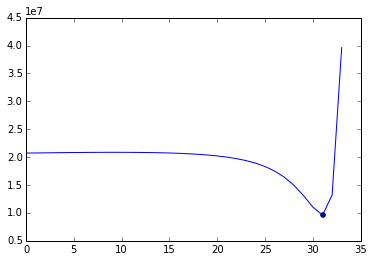

Best result: 9608553.88584 ; Omega: 0.4


In [115]:
plt.plot(results_i[:-5])
plt.xlim(0,35)
plt.scatter(results_i.index(min(results_i)), min(results_i))
plt.show()
print "Best result:",min(results_i),"; Omega:",0.4